# Digit Classification with KNN and Naive Bayes

The project attempts to build an image recognition system (KNN and Naive Bayes) to classify handwritten digits using the MNIST database. The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. For more information about the database:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# additional imports just for improving styling
import matplotlib.ticker as mtick
from typing import Callable
import warnings
import pandas as pd # pd is only used for pint formatting in Q7

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.22.1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X_raw, Y_raw = fetch_openml(name='mnist_784', return_X_y=True, cache=True)
print("load complete...")

load complete...


In [4]:
# Code added to:
#     - Preserve the raw data to avoid reloading the dataset.
#     - Avoid repeatedly normalizing X each time the block is run.
X, Y = X_raw, Y_raw

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

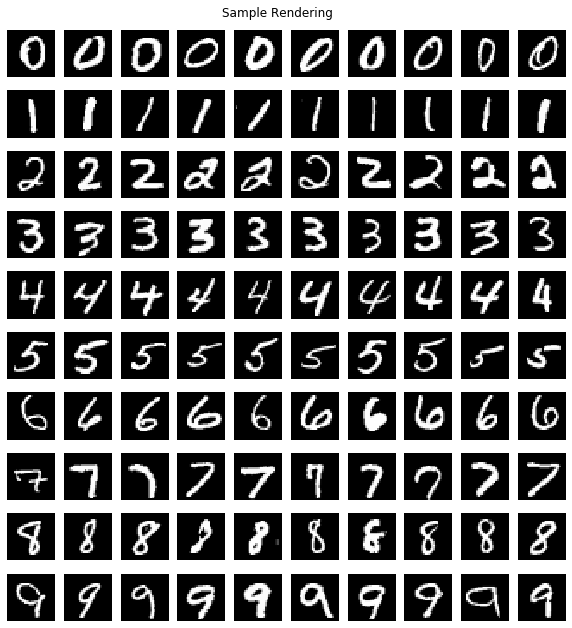

In [5]:
#def P1(num_examples=10):

### STUDENT START ###
def get_samples(y: np.ndarray, size:int) -> np.ndarray:
    """Return a 2d ndarray with the indices to find the digits in Y.
    
    Args: 
        y (np.ndarray): Output labels from the training dataset.
        size (int): Size of the sample (i.e. # of samples to be fetched 
            for each digit/).
    Return:
        (np.ndarray): 10x10 array with the 1st index being the digit 
        and 2nd index being the ith number of image of the digit found. 
        The value is the index for the image in Y.
    """
    # Pseudo:
    # 1. Create a ndarray, where:
    #     - 1st index is the the digit being tested
    #     - value is the index of image in the dataset
    # e.g.
    # [
    #     0: [3, 29, 38, ...]
    #     1:
    #     2:
    #     ...
    #     9:
    # ]
    #
    # 2. Loop through Y and fill the dictionary until all 10 keys are 
    # filled with 10 values (i.e. filled_row_count = 10).
    samples = np.full((size, size), -1)
    filled_row_count = 0
    for i, v in enumerate(y):
        digit = int(v)
        
        insert_index = size - np.sum(samples[digit] == -1)
        if insert_index >= size:
            continue
        else:
            samples[digit][insert_index] = i
            
            # quota is met for the first time; update filled count
            if insert_index == size - 1:
                filled_row_count += 1
            if filled_row_count == size:
                break
    
    return samples

samples = get_samples(Y, 10)
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.suptitle('Sample Rendering')
fig.subplots_adjust(top=0.95)
plt.rc('image', cmap='gray')
for index, _ in np.ndenumerate(axes):
    ax = axes[index]
    x = X[samples[index]]
    ax.imshow(x.reshape(28, 28))
    ax.axis('off')

plt.show()
### STUDENT END ###

#P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

In [6]:
#def P2(k_values):

### STUDENT START ###
def knn_predict(k: int = 1, 
                train_data: np.ndarray = mini_train_data, 
                train_labels: np.ndarray = mini_train_labels,
                x: np.ndarray = dev_data) -> np.ndarray:
    """Predict using k-nn.
    Return:
        (np.ndarray): Predicted labels.
    """
    m = KNeighborsClassifier()
    m.set_params(n_neighbors=k)
    m.fit(train_data, train_labels)
    return m.predict(x)

def accuracy_report(k: int,
                    y: np.ndarray, 
                    y_true: np.ndarray) -> float:
    """Funtion to calculate the accuracy.
    Args:
        pred (np.ndarray): Prediction results.
        ans (np.ndarray): True answer array..
    Return:
        (float): % of accuracy.
    """
    accuracy = classification_report(y_true, y, output_dict=True)['accuracy']
    print('K = {:.0f}, Accuracy = {:.3f}'.format(k, accuracy))

# accuracy reports
for i in range(1, 10, 2):
    accuracy_report(i, knn_predict(i, x=dev_data), dev_labels)

# classificationr report
p1 = knn_predict(1, x=dev_data)
print('\nClassification Report for K = 1:')
print(classification_report(dev_labels, p1))
### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

K = 1, Accuracy = 0.884
K = 3, Accuracy = 0.876
K = 5, Accuracy = 0.882
K = 7, Accuracy = 0.877
K = 9, Accuracy = 0.875

Classification Report for K = 1:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



ANSWER:  
**Performance Analysis**  
There are at least two important observations on K vs. Accuracy:
- K = 1 actually yields the highest accuracy.
- Accuracy improves from K = 3 to 5 and continues to drop afterwards.

Why does K = 1 yield the best result? There are two plausible explanations:
- The training dataset comes with a great variety of samples, so much so that it always contains at least one image that closely match each of the images we want to classify in the test dataset.
- The result can be simply due to luck. A different test dataset might yield a completely different result.

Why does accuracy drops as K grows beyond 5?
- This is the classical overfitting vs. generalization trade-off. 
- A small K value can lead to overfitting while a large K value overgeneralizes the training data.

**Most Difficult Prediction**  
Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?
Either 8 or 9 can be seen as the most "difficult" digit to classify depending on our definition of "difficulty." 
- 9 suffers from the lowest precision (high false positive)
- 8 suffers from the lowest recall (high false negative)

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Generating performance reports...
n = 100, 0.14 secs
n = 200, 0.22 secs
n = 400, 0.40 secs
n = 800, 0.77 secs
n = 1,600, 1.54 secs
n = 3,200, 3.01 secs
n = 6,400, 6.23 secs
n = 12,800, 13.17 secs
n = 25,600, 29.59 secs
n = 51,200, 68.35 secs
n = 60,000, 79.77 secs
Task complete!
Total Processing Time: 203.17 secs



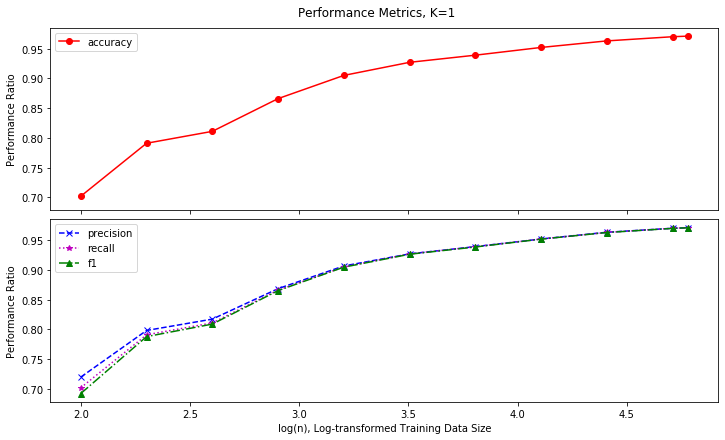

In [7]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
# prep the training data slices
# hardcode the params to generate a geometric series of r = 2
# first item is 100
# last item in the series is manually changed to 60000, size of train_data
r, a, n_max = 2, 100, len(train_data)
sizes = []
i = 1
while True:
    n = a * r ** (i - 1)
    if n > n_max:
        sizes.append(n_max)
        break
    else:
        sizes.append(n)
    i += 1

# generate the reports
# reports = []
# report = {n: ...
#           accuracy: ...
#           precision: ...
#           recall: ...
#           f1: ...
#           support: ...}
reports = []
print("Generating performance reports...")
timer_start = time.time()
for i in sizes:
    print('n = {:,d}'.format(i), end='')
    timer_i_start = time.time()
    
    x_train = train_data[:i:]
    y_train = train_labels[:i:]
    y_pred = knn_predict(train_data = x_train,
                         train_labels = y_train)
    
    # retrieve performance metrics
    r = classification_report(dev_labels, y_pred, output_dict=True)
    accuracy = r['accuracy']
    precision = r['weighted avg']['precision']
    recall = r['weighted avg']['recall']
    f1 = r['weighted avg']['f1-score']
    support = r['weighted avg']['support']
    
    # construct performance report for n = i
    report = {}
    report['n'] = i
    report['accuracy'] = accuracy
    report['precision'] = precision
    report['recall'] = recall
    report['f1'] = f1
    report['support'] = support
    reports.append(report)
    print(', {:.2f} secs'.format(time.time() - timer_i_start))
print('Task complete!')
print('Total Processing Time: {:.2f} secs'.format(time.time() - timer_start))
print('')

# ----------------------------------------------------------------------
# plotting starts here

def get_report(key:str, reports:list) -> np.ndarray:
    """Consolidate performance report by key.
    """
    if key not in reports[0].keys():
        return None
    return np.array([r[key] for r in reports])

# pull performance metrics
n = get_report('n', reports)
accuracy = get_report('accuracy', reports)
precision = get_report('precision', reports)
recall = get_report('recall', reports)
f1 = get_report('f1', reports)

# plot performance metrics
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)
fig.suptitle('Performance Metrics, K=1')
fig.tight_layout()
fig.subplots_adjust(top=0.93, hspace=0.05)
axes[0].plot(np.log10(n), accuracy, 
             color='r', linestyle='solid', marker = 'o', label='accuracy')
axes[1].plot(np.log10(n), precision, 
             color='b', linestyle='dashed', marker = 'x', label='precision')
axes[1].plot(np.log10(n), recall, 
             color='m', linestyle='dotted', marker = '*', label='recall')
axes[1].plot(np.log10(n), f1, 
             color='g', linestyle='dashdot', marker = '^', label='f1')
axes[0].legend()
axes[1].legend()
axes[0].set_ylabel('Performance Ratio')
axes[1].set_xlabel('log(n), Log-transformed Training Data Size')
axes[1].set_ylabel('Performance Ratio')
pass
### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
#accuracies = []
#P3(train_sizes, accuracies)

ANSWER:  
Overall, the accuracy increases with the sample size as expected. However, the incremental improvement slows down as n grows large, showing that additional information no longer presents the same amount of explanatory power. Other performance metrics (precision, recall, and f1) also exhibit similar trends.

Also note that the processing time increases time required substantially as k increases, going from below 1 sec (n = 100) all the way to above 60 secs (n = 60,000).

### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

MODEL 1 (No Transformation):
R2: 0.38
Predictions by Linear Regression:
n = 60,000, Accuracy = 1.01
n = 120,000, Accuracy = 1.16
n = 1,000,000, Accuracy = 3.38


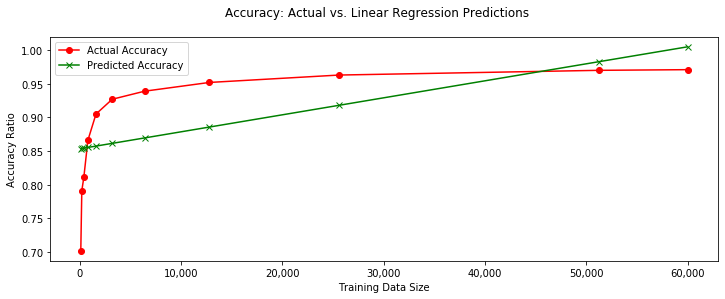


MODEL 2 (Transformed Model):
R2: 0.94
Predictions by Linear Regression:
log(n) = 5, Odds(Accuracy) = 29.89
log(n) = 5, Odds(Accuracy) = 33.32
log(n) = 6, Odds(Accuracy) = 43.84


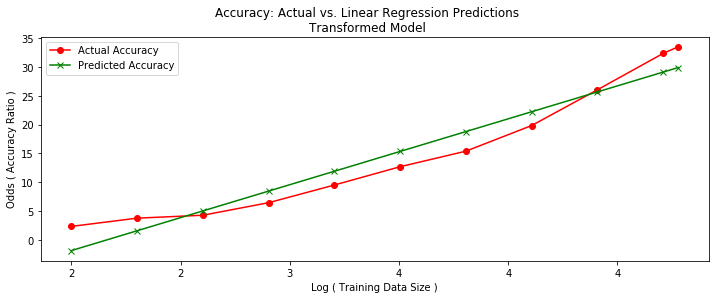


MODEL 2 (Transformed Model, Predictions Reversed Back to Original Scales):
R2: 0.94
Predictions by Linear Regression:
n = 60,000, Accuracy = 0.97
n = 120,000, Accuracy = 0.97
n = 1,000,000, Accuracy = 0.98


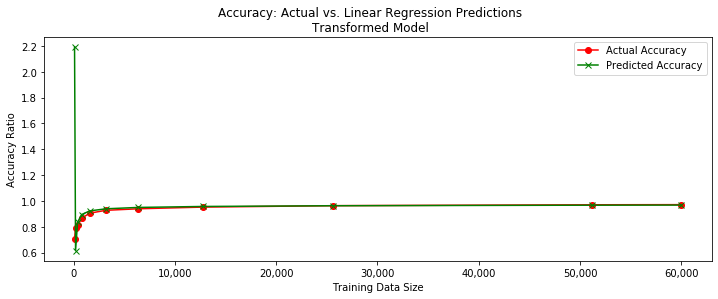


MODEL 3 (Transformed Model & Forced Zero Intercept, Predictions Reversed Back to Original Scales):
R2: 0.60
Predictions by Linear Regression:
n = 60,000, Accuracy = 0.96
n = 120,000, Accuracy = 0.96
n = 1,000,000, Accuracy = 0.97


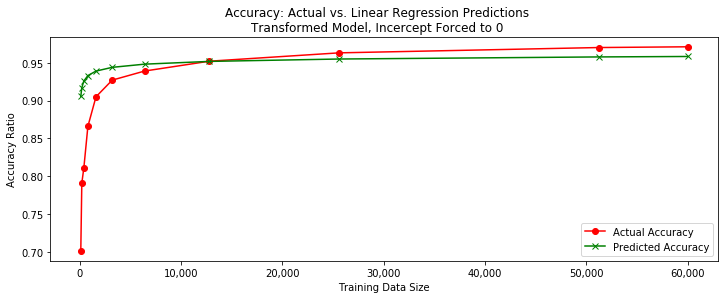

In [8]:
#def P4():

### STUDENT START ###
def reg_predict_n_plot(title:str,
                       reg: LinearRegression, 
                       n_actual: np.ndarray, 
                       a_actual: np.ndarray,
                       n_extra: np.ndarray = None,
                       n_tranf: Callable = None,
                       a_tranf: Callable = None,
                       n_tranf_r: Callable = None,
                       a_tranf_r: Callable = None,
                       x_label: str = 'Training Data Size',
                       y_label: str = 'Accuracy Ratio',
                       n_label: str = 'n',
                       a_label: str = 'Accuracy') -> None:
    """Predict and plot using the actual and extra data provided.
    
    Args:
        title (str): Title for the plot.
        reg (LinearRegression): Regresion model.
        n_actual (np.ndarray): Size of the training data.
        a_actual (np.ndarray): Accuracy of the prediction. 
        n_extra (np.ndarray): Additional data (training sizes) used for predictions.
        n_tranf (Callable): Function for transforming n, data size.
        a_tranf (Callable): Function for transforming accuracy.
        n_tranf_r (Callable): Function for reverse-transforming n, data size.
        a_tranf_r (Callable): Function for reverse-transforming accuracy.
    """
    # apply transformation
    if n_tranf is not None:
        n_actual = n_tranf(n_actual)
        n_extra = n_tranf(n_extra)
    if a_tranf is not None:
        a_actual = a_tranf(a_actual)
        
    # predict using the extra dataset
    if n_extra is not None:    
        n_extra_2d = n_extra[:, np.newaxis]
        a_pd_2d = reg.predict(n_extra_2d)

        # print predicted accuracies
        a_pd_print = a_pd_2d.flatten()
        if n_tranf_r is not None:
            n_extra = n_tranf_r(n_extra)
        if a_tranf_r is not None:
            a_pd_print = a_tranf_r(a_pd_print)
        print('Predictions by Linear Regression:')
        for i in range(n_extra.shape[0]):
            print('{} = {:,.0f}, {} = {:.2f}'.format(n_label,
                                                     n_extra[i], 
                                                     a_label,
                                                     a_pd_print[i]))
    # predict using the actual training set
    a_pd_2d = reg.predict(n_actual[:, np.newaxis])
    
    # reverse the transformation
    if n_tranf_r is not None:
        n_actual = n_tranf_r(n_actual)
    if a_tranf_r is not None:
        a_actual = a_tranf_r(a_actual)
        a_pd_2d = a_tranf_r(a_pd_2d.flatten())
    
    # plot actual vs. OLS
    fig, ax = plt.subplots(figsize=(10, 4))
    fig.suptitle(title)
    fig.tight_layout()
    fig.subplots_adjust(top=0.875)

    # plot data
    ax.plot(n_actual, a_actual, 
            color='r', linestyle='solid', marker='o', label='Actual Accuracy')
    ax.plot(n_actual, a_pd_2d, 
            color='g', linestyle='solid', marker='x', label='Predicted Accuracy')

    ax.legend()
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) 
    
    plt.show()
    pass

# pull actual accuracies
n = get_report('n', reports)
a = get_report('accuracy', reports)

# build OLS model 1
print('MODEL 1 (No Transformation):')
n_2d = n[:, np.newaxis]
a_2d = a[:, np.newaxis]
reg1 = LinearRegression().fit(n_2d, a_2d)
r2 = reg1.score(n_2d, a_2d)
print('R2: {:.2f}'.format(r2))
reg_predict_n_plot('Accuracy: Actual vs. Linear Regression Predictions',
                    reg1, n, a, np.array([60000, 120000, 1000000]))

# build OLS model 2, with transformation
n_tranf = lambda x: np.log10(x)
a_tranf = lambda a: a / (1 - a)
n_tranf_r = lambda x: 10 ** x
a_tranf_r = lambda y: y / (1 + y)
n_2d = n_tranf(n)[:, np.newaxis]
a_2d = a_tranf(a)[:, np.newaxis]

reg2 = LinearRegression().fit(n_2d, a_2d)
r2 = reg2.score(n_2d, a_2d)
n_extra = np.array([60000, 120000, 1000000])
print('\nMODEL 2 (Transformed Model):')
print('R2: {:.2f}'.format(r2))
reg_predict_n_plot('Accuracy: Actual vs. Linear Regression Predictions\nTransformed Model',
                    reg2, n, a, n_extra, 
                    n_tranf, a_tranf,
                    None, None,
                    'Log ( Training Data Size )', 'Odds ( Accuracy Ratio )',
                    'log(n)', 'Odds(Accuracy)')

# build OLS model 2, with transformation
print('\nMODEL 2 (Transformed Model, Predictions Reversed Back to Original Scales):')
print('R2: {:.2f}'.format(r2))
reg_predict_n_plot('Accuracy: Actual vs. Linear Regression Predictions\nTransformed Model',
                    reg2, n, a, n_extra, 
                    n_tranf, a_tranf,
                    n_tranf_r, a_tranf_r)


# build OLS model 3, same as Model 2 with y-intercept forced to 0
print('\nMODEL 3 (Transformed Model & Forced Zero Intercept, Predictions Reversed Back to Original Scales):')
reg3 = LinearRegression(fit_intercept=False).fit(n_2d, a_2d)
r2 = reg3.score(n_2d, a_2d)
print('R2: {:.2f}'.format(r2))
n_extra = np.array([60000, 120000, 1000000])
reg_predict_n_plot('Accuracy: Actual vs. Linear Regression Predictions\nTransformed Model, Incercept Forced to 0',
                    reg3, n, a, n_extra, 
                    n_tranf, a_tranf,
                    n_tranf_r, a_tranf_r)
### STUDENT END ###

#P4()

ANSWER:  
Model 1 (Before Transformation)  
Model 1 predicts a straight line that comes with no upper limit for the dependent variable (accuracy). The prediction is problematic because the actual relationship between data size and accuracy does not not look linear based on the visuals from the plot. A bigger issue, however, is that the predicted accuracy grows greater than 1, which is not even a realistic value. The poor performance of the model is reflected by the low R squared.

Model 2 & 3 (After Transformation)  
Model 2 produces a much better R squared and fits the true accuracies quite closely as the data size grows large. However, there is one problem: Without forcing a zero intercept (which would lead to a much worse performance, as demonstrated by Model 3), Model 2 predicts negative accuracy values (after odds transformation) for small data sizes. The predicted negative odds values, unfortunately, translate to unrealistic accuracy ratios after the reverse transformation is applied.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Confusion Matrix:
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]



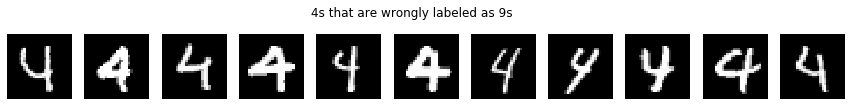

In [9]:
#def P5():

### STUDENT START ###
labels_pd = knn_predict()
print('Confusion Matrix:')
print(confusion_matrix(dev_labels, labels_pd))

# print true 4s that are wrongly labeled as 9
confusions = dev_data[(dev_labels == '4') & (labels_pd == '9')]
fig, axes = plt.subplots(1, 11, figsize=(15, 2))
fig.suptitle('4s that are wrongly labeled as 9s')
fig.subplots_adjust(top=1)
plt.rc('image', cmap='gray')
for i in range(confusions.shape[0]):
    axes[i].imshow(confusions[i].reshape(28, 28))
    axes[i].axis('off')
    
print('')
plt.show()
pass
### STUDENT END ###

#P5()

ANSWER:  
4 and 9 have the highest number of "confusions." In particular, 4 is wrongly identified as 9 (false negative for 4, and false positive for 9) a lot more often than the other way around (11 vs. 3 wrong identifications).

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

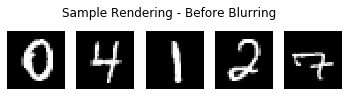

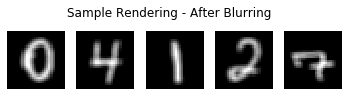


Model 1 (No Blur):
Accuracy 	= 0.88
Precision 	= 0.89
Recall 		= 0.88
F1 		= 0.88
support 	= 1000

Model 2 (Blur Training Data):
Accuracy 	= 0.35
Precision 	= 0.51
Recall 		= 0.35
F1 		= 0.29
support 	= 1000

Model 3 (Blur Dev Data):
Accuracy 	= 0.77
Precision 	= 0.82
Recall 		= 0.77
F1 		= 0.77
support 	= 1000

Model 4 (Blur Training & Dev Data):
Accuracy 	= 0.90
Precision 	= 0.91
Recall 		= 0.90
F1 		= 0.90
support 	= 1000


In [10]:
#def P6():
    
### STUDENT START ###
# ref: https://en.wikipedia.org/wiki/Kernel_(image_processing)
# ref (real gaussian): https://tinyurl.com/ya33gfnq
def simple_gkernel(weight: int, size: int) -> np.array:
    """Create a simple weighted average kernal. The center of the 
    resulting kernal is always one and the weight is applied to the 
    surrounding pixels.
    e.g. 
        weight = 1/2, size = 3
        return:
        | 0.5, 0.5, 0.5 |
        | 0.5,   1, 0.5 |
        | 0.5, 0.5, 0.5 |
    """
    n = size ** 2 # total # of elements in matrix
    kernal = np.ones(n) * weight
    kernal[n//2] = 1
    return kernal.reshape(size, size)
    
KERNAL_GAUSSIAN_BLUR = simple_gkernel(4, 3)

def apply_kernal(kernal: np.ndarray, 
                 img: np.ndarray, 
                 pxpos: tuple,
                 edge_handling: str = "kcrop") -> float:
    """Apply kernal to the image's pixel at img[pxpos[0]][pxpos[0]].
    """
    if edge_handling != 'kcrop':
        # only kernal corp is implemented
        return 0
    
    # prep kernal params
    kflip = np.flip(kernal)
    krow_count = kflip.shape[0]
    kcol_count = kflip.shape[1]
    kcenter = ((krow_count - 1) / 2, (kcol_count - 1) / 2)
    
    divisor = 0
    sum_ = 0
    for krow in range(krow_count):
        for kcol in range(kcol_count):
            # dtc: distance from the kernal's current element to the 
            # kernal's "cetner" element
            dtc = (krow - kcenter[0], kcol - kcenter[1])
            
            # get img pixel where the current kenral element should apply
            imgrow = int(pxpos[0] + dtc[0])
            imgcol = int(pxpos[1] + dtc[1])
            if (imgrow < 0 or imgrow >= img.shape[0] or
                imgcol < 0 or imgcol >= img.shape[1]):
                # skip the application if the targeted image pixel is 
                # out of range
                continue
            px = img[imgrow][imgcol]
            
            # apply kernal
            kelement = kflip[krow][kcol]
            sum_ += kelement * px
            divisor += 1

    return (sum_ / divisor)

def conv_kcrop(kernal: np.ndarray, img: np.ndarray) -> np.ndarray:
    """ Convolution with kernel crop edge handling. 
    
    Ref:
        https://en.wikipedia.org/wiki/Kernel_(image_processing)
        http://www.andreageremia.it/tutorial_matrix.html
    
    Args:
        kernal (np.ndarray): A 2D array of shape m x n.
        img (np.ndarray): A 2D array of shape x x y.
    Return:
        (np.ndarray): A 2D array of shape ixj
    """
    img2 = np.empty((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img2[i][j] = apply_kernal(kernal, img, (i, j))
    
    return img2

# original rendering
fig, axes = plt.subplots(1, 5, figsize=(6, 2))
fig.suptitle('Sample Rendering - Before Blurring')
fig.subplots_adjust(top=1.1)
plt.rc('image', cmap='gray')
for i in range(axes.shape[0]):
    ax = axes[i]
    img = mini_train_data[i].reshape(28, 28)
    ax.imshow(img)
    ax.axis('off')
plt.show()

# blur rendering
fig, axes = plt.subplots(1, 5, figsize=(6, 2))
fig.suptitle('Sample Rendering - After Blurring')
fig.subplots_adjust(top=1.1)
for i in range(axes.shape[0]):
    ax = axes[i]
    img = mini_train_data[i].reshape(28, 28)
    ax.imshow(conv_kcrop(KERNAL_GAUSSIAN_BLUR, img))
    ax.axis('off')
plt.show()

# ------------------------------------------------------------
# Modeling

def blur(data: np.ndarray) -> np.ndarray:
    """ Apply Gaussian Blur to each of the images in the array.
    Args:
        data (np.ndarray): Array of ndarray objects, each with 28*28 items.
    Return:
        (np.ndarray): Array of 28x28 ndarray objects applied with the 
            blur filter. 
    """
    return [conv_kcrop(KERNAL_GAUSSIAN_BLUR, v.reshape(28, 28)).flatten() 
            for v in data]

def print_perf_report(intro_txt: str,
                      y_true: np.ndarray, 
                      y_pred: np.ndarray) -> None:
    r = classification_report(y_true, y_pred, output_dict=True)
    accuracy = r['accuracy']
    precision = r['weighted avg']['precision']
    recall = r['weighted avg']['recall']
    f1 = r['weighted avg']['f1-score']
    support = r['weighted avg']['support']
    
    print('')
    print(intro_txt)
    print('Accuracy \t= {:.2f}'.format(accuracy))
    print('Precision \t= {:.2f}'.format(precision))
    print('Recall \t\t= {:.2f}'.format(recall))
    print('F1 \t\t= {:.2f}'.format(f1))
    print('support \t= {:.0f}'.format(support))
          
# 4 Models:
# 1. Do not use the filter
# 2. Filter the training data but not the dev data
# 3. Filter the dev data but not the training data
# 4. Filter both training data and dev data
train_data_blur = blur(mini_train_data)
dev_data_blur = blur(dev_data)
pd_m1 = knn_predict()
pd_m2 = knn_predict(train_data = train_data_blur, x = dev_data)
pd_m3 = knn_predict(x = dev_data_blur)
pd_m4 = knn_predict(train_data = train_data_blur, x = dev_data_blur)

warnings.filterwarnings('ignore') # remove warning message due to poor predictions
print_perf_report('Model 1 (No Blur):', dev_labels, pd_m1)
print_perf_report('Model 2 (Blur Training Data):', dev_labels, pd_m2)
print_perf_report('Model 3 (Blur Dev Data):', dev_labels, pd_m3)
print_perf_report('Model 4 (Blur Training & Dev Data):', dev_labels, pd_m4)
### STUDENT END ###

#P6()

ANSWER:
Overall, the prediction performance improves when the blur is applied to both training and test/dev data. This makes sense because blurring smooths out the rough edges and make digit rendering a bit more "general." On the other hand, performance suffers if the filter is applied ONLY to the training or test/dev data. This is because we would be essentially training and predicting on two different data sets with different characteristics.

However, further analysis shows that a very small amount of smoothing on just the training set alone can actually help improve the prediction performance. This is because blurring, when applied moderately, can improve the issue of overfitting to rough edges.

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number. For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model. For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy. Does the multinomial version improve the results? Why or why not?

In [11]:
#def P7():

### STUDENT START ###
# model 1 implementation starts here
BERNOULLI_BW_THD = 0.1
bnb = BernoulliNB(binarize=BERNOULLI_BW_THD)
bnb.fit(mini_train_data, mini_train_labels)
pd_m1 = bnb.predict(dev_data)

# model 2 implementation starts here
MULTI_SHADE_THD = [0.1, 0.9]
def categorize_px(x: np.ndarray, thd: list = MULTI_SHADE_THD) -> np.ndarray:
    x_categorized = np.empty(x.shape)
    for i, img in enumerate(x):
        # 0: x < thd[1]
        # 1: thd[1] <= x <= thd[2]
        # 2: thd[2] < x
        c = np.zeros(img.shape[0])
        c[(thd[0] <= img) & (img <= thd[1])] = 1
        c[thd[1] < img] = 2
        x_categorized[i] = c

    return x_categorized

# categorize data
mini_train_data_c = categorize_px(mini_train_data)
dev_data_c = categorize_px(dev_data)

# build model 2
mnb = MultinomialNB()
mnb.fit(mini_train_data_c, mini_train_labels)
pd_m2 = mnb.predict(dev_data_c)

# print reports
print_perf_report('Model 1 (Binary Input):', dev_labels, pd_m1)
print_perf_report('Model 2 (Category Input):', dev_labels, pd_m2)
### STUDENT END ###

#P7()


Model 1 (Binary Input):
Accuracy 	= 0.81
Precision 	= 0.82
Recall 		= 0.81
F1 		= 0.81
support 	= 1000

Model 2 (Category Input):
Accuracy 	= 0.81
Precision 	= 0.82
Recall 		= 0.81
F1 		= 0.81
support 	= 1000


ANSWER:  
No, the performance did not improve. The results can be explained by the fact that pixels categorized as gray (with values between 0.1 and 0.9) are not significant enough in quantity to make an impact on the posterior probabilities predicted by Naive Bayes. 

Detailed Explanation:
- Naive Bayes is a function of $p(y)$ and $p(x|y)$. 
- $p(y)$ is exactly the same between the two models because of the same training data.
- $p(x|y)$ also remains roughly the same. Judging from the images rendered in Part I, most images look to be dominated by either black or white pixels. As a result, there are not enough gray pixels to cause any meaningful difference in predictions.

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value. What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

,Alpha,Avg. Accuracy
0,0,0.814
1,1e-10,0.814
2,0.0001,0.819
3,0.001,0.825
4,0.01,0.822
5,0.1,0.818
6,0.5,0.813
7,1,0.809
8,2,0.805
9,10,0.783


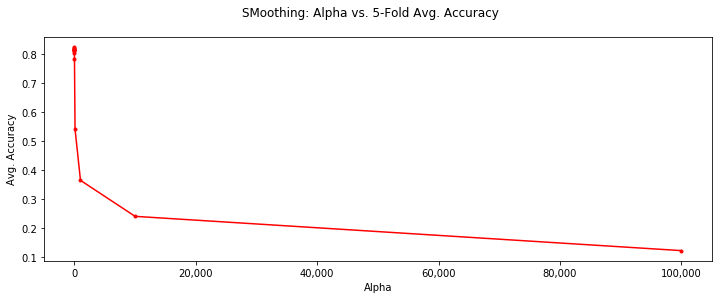

In [10]:
#def P8(alphas):

### STUDENT START ###
ALPHAS = (0, 1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 
          1, 2, 10, 100, 1000, 10000, 100000)

# remove warning message due to poor predictions
warnings.filterwarnings('ignore')

# fir trainning data using 5-fold
nb = BernoulliNB(binarize=0)
# cv=None because GridSearchCV defaults to 5-fold as required
gs = GridSearchCV(nb, param_grid={'alpha': ALPHAS}, scoring='accuracy', 
                  cv=None, return_train_score=True)
gs.fit(mini_train_data, mini_train_labels)

# print report
df = pd.DataFrame(gs.cv_results_['params']).join(
        pd.DataFrame(gs.cv_results_['mean_test_score']), how='outer')
df.columns = ['Alpha', 'Avg. Accuracy']
temp = df['Alpha']
df['Alpha'] = df['Alpha'].apply(lambda x: '{:,.0f}'.format(x) if x >= 1 else x)
display(df)
df['Alpha'] = temp

# plot actual vs. OLS
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('SMoothing: Alpha vs. 5-Fold Avg. Accuracy')
fig.tight_layout()
fig.subplots_adjust(top=0.875)

# plot data
ax.plot(df['Alpha'], df['Avg. Accuracy'], 
        color='r', linestyle='solid', marker='.')
ax.set_xlabel('Alpha')
ax.set_ylabel('Avg. Accuracy')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) 
### STUDENT END ###

# alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# nb = P8(alphas)
# print()
# print("Best alpha = ", nb.best_params_)

ANSWER:  
Accuracy slightly improves with a small alpha increment from 0 to 0.001, but starts dropping afterwards. This is expected because smoothing improves generalizes and makes predictions a bit more "conservative." Smoothing could also be used to cover rare cases such as edgy cases with a probability of zero. The trade-off, however, is that accuracy can suffer if the model is overly smoothed.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

In [13]:
##### def P9():

### STUDENT END ###
nb1 = GaussianNB()
nb1.fit(mini_train_data, mini_train_labels)
print('Model 1 (Default Gaussian NB) \nAccuracy = {}'.format(nb1.score(dev_data, dev_labels)))

nb2 = GaussianNB(var_smoothing=0.065)
nb2.fit(mini_train_data, mini_train_labels)
print('\nModel 2 (with Smoothing) \nAccuracy = {}'.format(nb2.score(dev_data, dev_labels)))
### STUDENT END ###

#P9()

Model 1 (Default Gaussian NB) 
Accuracy = 0.593

Model 2 (with Smoothing) 
Accuracy = 0.819


ANSWER:  
The problem with Gaussian Naive Bayes is the somewhat extreme assumption that our pixel values follows a Gaussian distribution. The problem can be mediated by artificially increasing the variance of the Gaussian distribution, which leads to a "wider" Gaussian curve and gives more weight to the values that are a bit further away from the mean. 

However, an adjustment that is too high can also be problematic. This is because too much weight would be given to the values that are too far away from the mean (and thus don't necessarily contribute to the predictions in our case).

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1. Show the grid. How do the generated digit images compare to the training digit images?

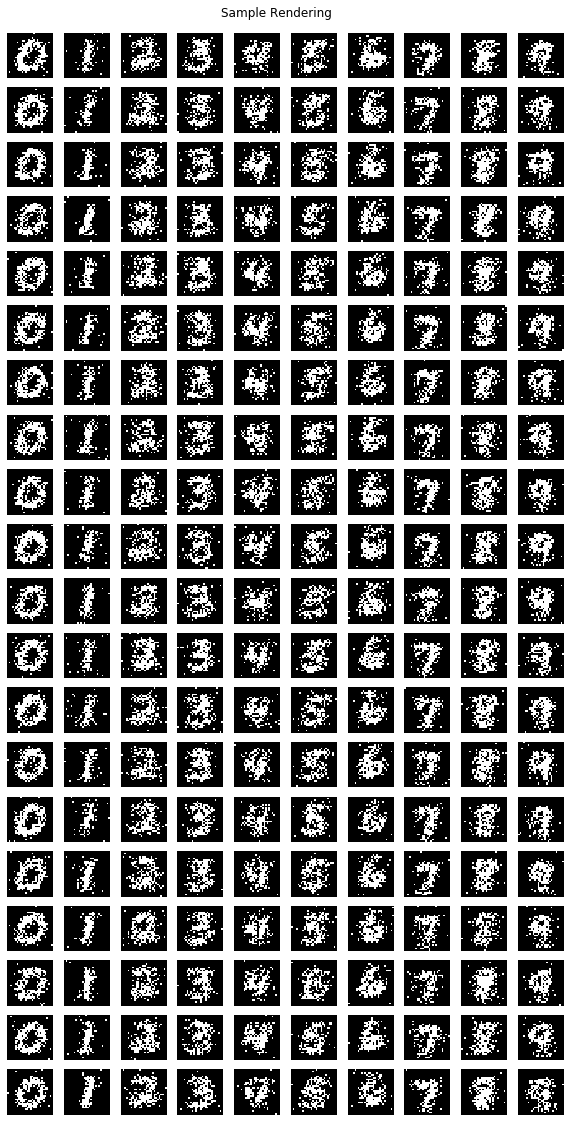

In [14]:
#def P10(num_examples):

### STUDENT START ###
N_ROWS = 20

# build model
nb = BernoulliNB(binarize=0)
nb.fit(mini_train_data, mini_train_labels)
p_pred = np.exp(nb.feature_log_prob_)

# generate samples
samples = []
for _ in range(N_ROWS):
    p_random = np.random.random(p_pred.shape)
    digits = np.where(p_random < p_pred, 1, 0)
    samples.append(digits)
samples = np.array(samples)
samples.shape

# render images
fig, axes = plt.subplots(samples.shape[0], samples.shape[1], 
                         figsize=(10, 18))
fig.suptitle('Sample Rendering')
fig.subplots_adjust(top=0.96)
plt.rc('image', cmap='gray')
for index, _ in np.ndenumerate(axes):
    ax = axes[index]
    ax.imshow(samples[index].reshape(28, 28))
    ax.axis('off')

plt.show()
### STUDENT END ###

#P10(20)

ANSWER:  
Most images resemble a "noisy" version of digits' true forms. Some digits' resemblance is stronger than the others. For example, all zeros and ones are fairly distinguishable while the difference between 4 and 9 is frequently unclear.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [15]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
# fir trainning data usinf 5-fold
ALPHA = 0.001
BIN_EDGES = np.array([0.5, 0.9, 0.999, 0.99999, 0.9999999, 
                      0.999999999, 0.99999999999, 0.9999999999999, 1.0])

# build models
nb = BernoulliNB(binarize=0, alpha=ALPHA)
nb.fit(mini_train_data, mini_train_labels)

# pull max probabilities
preds = nb.predict(dev_data)
preds_proba = nb.predict_proba(dev_data)
max_proba_arr = np.amax(preds_proba, axis=1)

# create bins
# -1 to make bin labels start from 0
inds = np.digitize(max_proba_arr, BIN_EDGES) - 1
bin_count = np.unique(inds).shape[0]
accuracies = [None] * bin_count
for i in range(bin_count):
    # pull counts
    y_true = dev_labels[inds == i]
    y_pred = preds[inds == i]
    correct = sum(y_true == y_pred)
    total = sum(inds == i)
    
    # store accuracies
    accuracies[i] = {'posterior_prob': '', 
                     'correct': 0, 
                     'total': 0, 
                     'accuracy': 0}
    accuracies[i]['correct'] = correct
    accuracies[i]['total'] = total
    accuracies[i]['accuracy'] = correct / total
    
    # store edges
    if i == 0:
        accuracies[i]['posterior_prob'] = '< {}'.format(BIN_EDGES[i])
    else:
        txt = '{} <= p < {}'
        if i == bin_count-1:
            txt = '{} <= p <= {}'
        accuracies[i]['posterior_prob'] = txt.format(BIN_EDGES[i-1], BIN_EDGES[i])
    
df = pd.DataFrame(accuracies)
display(df)
### STUDENT END ###

# buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# correct = [0 for i in buckets]
# total = [0 for i in buckets]

# P11(buckets, correct, total)

# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

,posterior_prob,correct,total,accuracy
0,< 0.5,11,31,0.354839
1,0.5 <= p < 0.9,29,67,0.432836
2,0.9 <= p < 0.999,27,59,0.457627
3,0.999 <= p < 0.99999,30,46,0.652174
4,0.99999 <= p < 0.9999999,48,62,0.774194
5,0.9999999 <= p < 0.999999999,26,33,0.787879
6,0.999999999 <= p < 0.99999999999,34,43,0.790698
7,0.99999999999 <= p < 0.9999999999999,16,19,0.842105
8,0.9999999999999 <= p <= 1.0,602,640,0.940625


ANSWER:  
The accuracy generally increases with the posterior probability. However, the two do not match each other and accuracy never rises above 90% until the posterior probability becomes nearly 1 above 0.9999999999999.

### Part 12:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

In [16]:
#def P12():

### STUDENT START ###
# library for determing symmetry
import scipy.stats as ss
from sklearn.preprocessing import normalize

# Examine problem areas using confusion table. Finding: Thre seems to 
# be problems with 8 and 3 in general. Examples:
# prediction:  3  8  3  2  8
# actual:      5  3  8  3  2
nb1 = BernoulliNB(binarize=0, alpha=ALPHA)
nb1.fit(mini_train_data, mini_train_labels)
print('Accuracy before new features:', nb1.score(dev_data, dev_labels))
print('Confusion Matrix:')
print(confusion_matrix(dev_labels, nb1.predict(dev_data)))

# ----------------------------------------------------------------------
# Plan to tackle the observed issues:
# - Testing vertical/horizontal symmetry...
# - Summing pixel values in each column...

# column sums
def get_img_cr_sums(data: np.ndarray, 
                    img_size: int = 28, 
                    mode: str = 'c',
                    binary_thd: float = 0.5) -> np.ndarray:
    """Get image column/row sums. Loop through each of the row in data 
    (assuming to be an image of size "img_size by img_size"), calculate the 
    sum for each column of the image, and return the results in a 
    ndarray of size, data.shape[0] by img_size.
    
    Args:
        data (np.ndarray): Dataset with each item being an image.
        img_size (int): Images are assumed to be of the same size, img_size x img_size.
        mode (str): Set 'c' to sum by columns, and 'r' by rows.
        binary_thd (float): Output 1 if above or equal to the thd.
    Return:
        (np.ndarray): Array of size, data.shape[0] by img_size.
    """
    # prep for the loops
    n_data = data.shape[0]
    sums = np.zeros(n_data * img_size).reshape(n_data, img_size)
    
    # loop through each data point
    for i in range(n_data):
        
        # loop through each of the image columns/rows
        img_cr_sums = np.zeros(img_size)
        for j in range(img_size):
            # sum by col or row
            indices = []
            if mode == 'c':
                indices = range(j, img_size**2, img_size)
            else:
                index_start = j * img_size
                index_end = index_start + img_size - 1
                indices = range(index_start, index_end)
            img_cr_sums[j] = sum(data[i][indices])
        
        # normalize & binarized
        img_cr_sums /= np.max(img_cr_sums)
        img_cr_sums[img_cr_sums >= binary_thd] = 1
        img_cr_sums[img_cr_sums < binary_thd] = 0
        
        # add the 28 column/row sums to the return arr
        sums[i] = img_cr_sums
    
    return sums

def get_symmetry_metrics(data: np.ndarray, 
                         cor_thd: float = 0.8, 
                         img_size: int = 28,
                         mode: str = 'v') -> np.ndarray:
    """
    Args:
        data (np.ndarray): Dataset with each item being an image.
        cor_thd (float): Threshold of the correlation, above which symmetry 
            will be determined as true.
        img_size (int): Images are assumed to be of the same size, img_size x img_size.
        mode (str): Set to 'v' for testing vertical symmetry. Set to 'h' for horizontal.
    Return:
        (np.ndarray): array of 1 and 0. 1 if symmetric, 0 otherwise.
    """
    if img_size % 2 != 0:
        print('Error: Unable to find image center...')
        return None
    
    cors = np.zeros((data.shape[0], img_size//2))
    n_half = img_size ** 2 // 2 # half of total number of pixels
    if mode == 'v':
        for i in range(data.shape[0]):
            top = data[i][:n_half]
            bottom = data[i][n_half:]
            
            # transform to 2D and flip bottom
            top = top.reshape(img_size//2, img_size)
            bottom = bottom.reshape(img_size//2, img_size)
            bottom = np.flip(bottom, 0)
            
            # loop through img columns to calculate correlations
            for j in range(top.shape[0]):
                cor = ss.pearsonr(top[j, :], bottom[j, :])[0]
                if np.isnan(cor):
                    cor = 0
                cors[i][j] = cor
    else:
        # loop through data rows for each image
        for i in range(data.shape[0]):
            img = data[i].reshape(img_size, img_size)
            left = img[:, :img_size//2]
            right = img[:, img_size//2:]
            right = np.flip(right, 1) # flip right
            
            # loop through img columns to calculate correlations
            for j in range(left.shape[1]):
                cor = ss.pearsonr(left[:, j], right[:, j])[0]
                if np.isnan(cor):
                    cor = 0
                cors[i][j] = cor
                
    cors = np.where(cors >= cor_thd, 1, 0)
    return cors
    
def get_features(data: np.ndarray) -> list:
    """Construct new features for the input space. 
    """
    # apply row sum test
    row_sums = get_img_cr_sums(data, 
                               mode='r',
                               binary_thd=0.5)
    # apply horizontal symmetry test
    symmetry_h = get_symmetry_metrics(mini_train_data, 
                                      cor_thd=0.8, 
                                      mode='h')
    
    # append new features
    data = np.append(data, row_sums, axis=1)
    data = np.append(data, symmetry_h, axis=1)

    return data

mtd_new = get_features(mini_train_data)
dd_new = get_features(dev_data)

nb2 = BernoulliNB(binarize=0, alpha=ALPHA)
nb2.fit(mtd_new, mini_train_labels)
print('\nAccuracy after new features:', nb2.score(dd_new, dev_labels))
print('Confusion Matrix Difference (i.e. After Minus Before):')
print(confusion_matrix(dev_labels, nb2.predict(dd_new)) - 
      confusion_matrix(dev_labels, nb1.predict(dev_data)))
### STUDENT END ###

#P12()

Accuracy before new features: 0.823
Confusion Matrix:
[[ 94   0   2   2   0   5   1   0   2   0]
 [  0 108   3   1   0   0   0   0   6   0]
 [  3   0  88   1   2   0   3   0   9   0]
 [  0   1   8  73   1   2   0   0  10   2]
 [  0   0   1   0  77   0   2   1   2   9]
 [  2   0   1  15   2  61   3   0   2   2]
 [  0   2   1   0   3   4  91   0   1   0]
 [  1   0   1   0   5   0   0  87   2   6]
 [  0   2   5   9   1   4   0   0  71   2]
 [  0   2   0   0   7   0   0   9   4  73]]

Accuracy after new features: 0.839
Confusion Matrix Difference (i.e. After Minus Before):
[[ 0  0  0 -1  0 -2  0  0  3  0]
 [ 0  1 -1  0  0  1  0  0 -1  0]
 [-1  0  1  2  1  0  0  0 -3  0]
 [ 1  0 -2  0  0  1  0  0 -1  1]
 [ 0  0  0  0  2  0 -1 -1  0  0]
 [ 1  0  0  0  0 -1  0  0  0  0]
 [ 0 -1  0  0  0  0 -1  0  2  0]
 [ 0  0  1  0  0  0  0  1 -1 -1]
 [ 0  0 -1 -3  0 -1  0  0  7 -2]
 [ 0  1  0  0 -2  1  0 -3 -3  6]]


ANSWER:  
**New Features:**  
Two additional feature sets are applied:
- **Row Sums**
    - Pixel values in each row are summed up and normalized. 
    - Normalized values above or equal to 0.8 are entered as 1; 0 otherwise.
- **Horizontal Symmetry Test**
    - Each image is cut in half vertically. 
    - The left half is "flipped over" (i.e. mirrored).
    - Pearson correlation coefficient is then calculated for each of the 14 columns.
    - Columns with coefficient above or equal to 0.8 are entered as 1; 0 otherwise.

**Result:**  
Accuracy improves from 0.823 to 0.839. The problem digits (3, 5, and 8) see moderate improvements on precisions and recalls.  

Note that a new confusions matrix is constructed after the new features are applied. The original confusion matrix is then subtracted from the new one to observe the improvements. 

**Justifications:**
- 3, 5, and 8 are identified as problem areas using the confusion matrix prior to constructing new features.
- Why applying row sums? 
    - Notice how the shapes of 3, 5, and 8 vary from top down.
    - 8, in particular, has a thin waist but wide head and bottom.
- Why applying horizontal symmetry test?
    - 8 has a strong symmetry.